# Introduction

Today I'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**:
I will use [Rebrickable](https://rebrickable.com/downloads/) that has compiled data on all the LEGO pieces in existence.

<img src="assets/bricks.jpg">

# Import Statements

In [1]:
import pandas as pd

df_colors = pd.read_csv('data/colors.csv')
df_sets = pd.read_csv('data/sets.csv')
df_themes = pd.read_csv('data/themes.csv')

# Data Exploration

In [2]:
df_colors.head(5)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
df_colors.tail(5)

,id,name,rgb,is_trans
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f
134,9999,[No Color],05131D,f


In [4]:
df_colors.shape

(135, 4)

In [5]:
df_colors["name"].nunique()

135

**Q1** Compare the number of transparent colours versus the number of opaque colours of lego:

In [6]:
df_colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [7]:
df_colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="https://imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [8]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
df_sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [10]:
df_sets.shape

(15710, 5)

**Q2** In which year were the first LEGO sets released and what were these sets called?

In [11]:
df_sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Q3**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [12]:
df_sets[df_sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Q4**: Find the top 5 LEGO sets with the most number of parts. 

In [13]:
df_sets.sort_values('num_parts', ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Q5** How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [14]:
df_sets_year = df_sets.groupby("year").count()

In [15]:
df_sets_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


In [16]:
df_sets_year.tail()

,set_num,name,theme_id,num_parts
year,,,,
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840
2020,674,674,674,674
2021,3,3,3,3


#### Visualise the trend

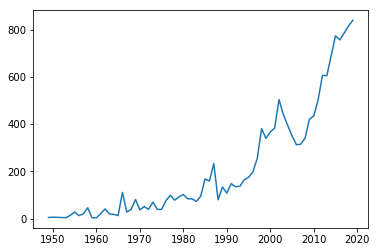

In [17]:
import matplotlib.pyplot as plt
plt.plot(df_sets_year.index[:-2], df_sets_year.set_num[:-2])
plt.show()

### Aggregating the data

Count the number of unique theme_ids per calendar year.

In [18]:
themes_year = df_sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [19]:
themes_year.rename(columns = {'theme_id': 'nr_themes'}, inplace = True)
themes_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [20]:
themes_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


#### Plotting the number of themes released by year on a line chart. (excluding 2020 and 2021 due to incomplete data). 

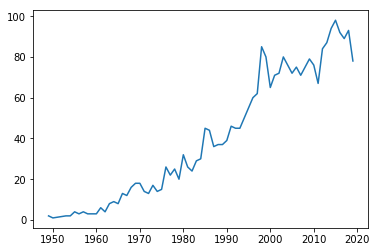

In [21]:
plt.plot(themes_year.index[:-2], themes_year.nr_themes[:-2])
plt.show()

### Line Charts with Two Seperate Axes

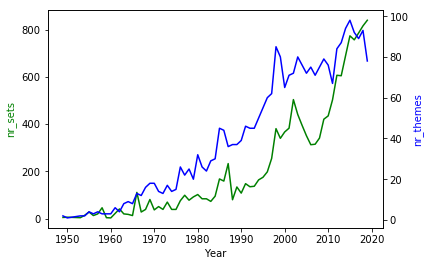

In [22]:
%matplotlib inline

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_sets_year.index[:-2], df_sets_year.set_num[:-2], color='g')
ax2.plot(themes_year.index[:-2], themes_year.nr_themes[:-2], 'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('nr_sets', color='g')
ax2.set_ylabel('nr_themes', color='b')

**Q6**: How many parts did the average LEGO set released in 1954 compared to present day?

In [23]:
avg_df_sets_year = df_sets.groupby("year").agg({"num_parts": "mean"})

In [24]:
avg_df_sets_year.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [25]:
avg_df_sets_year.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


### Scatter Plots in Matplotlib

**Q7**: Has the size and complexity of LEGO sets increased over time based on the number of parts?

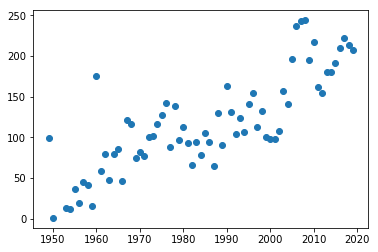

In [26]:
plt.scatter(avg_df_sets_year.index[:-2], avg_df_sets_year.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

<img src="https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Q8** Which theme has the largest number of individual sets?

In [27]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [28]:
df_themes.tail()

,id,name,parent_id
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0
595,709,LEGO Art,NaN


In [29]:
df_themes.shape

(596, 3)

#### Exploring the themes

In [30]:
df_themes[df_themes.name == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [31]:
df_sets[df_sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [32]:
df_sets[df_sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [33]:
set_theme_counts = df_sets['theme_id'].value_counts()

In [34]:
set_theme_counts[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [35]:
set_theme_counts = pd.DataFrame({"id": set_theme_counts.index,
                               "set_count": set_theme_counts.values})

set_theme_counts.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [36]:
merged_df = pd.merge(set_theme_counts, df_themes, on='id')

In [37]:
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


In [41]:
merged_df.sort_values('set_count', ascending=False).head(5)

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df['name'][:10], merged_df['set_count'][:10])